In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [44]:
data = pd.read_csv(r"covtype.csv")
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [45]:
print(data.shape)
print(list(data.columns))
describe = pd.DataFrame(data.describe())
describe
print(data.isnull().sum())

(581012, 55)
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']
Elevation                             0
Aspect                            

Text(0.5, 1.0, 'Elevation')

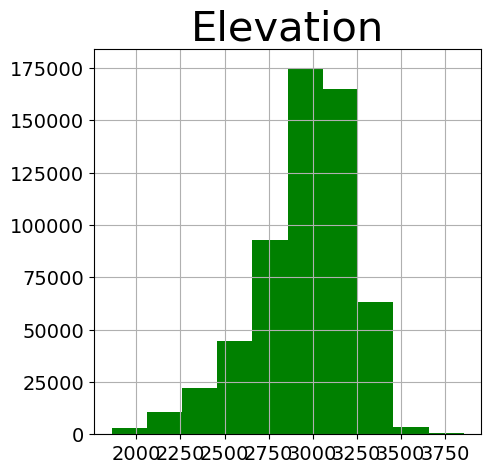

In [46]:
data["Elevation"].hist(figsize=(5,5),color='green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Elevation",fontsize=30)

Text(0.5, 1.0, 'Aspect')

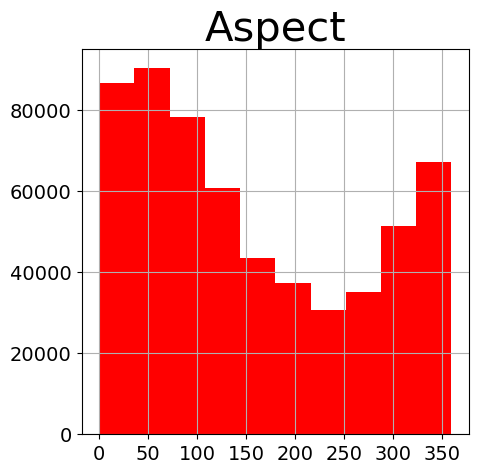

In [47]:
data["Aspect"].hist(figsize=(5,5),color='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Aspect",fontsize=30)

Text(0.5, 1.0, 'Slope')

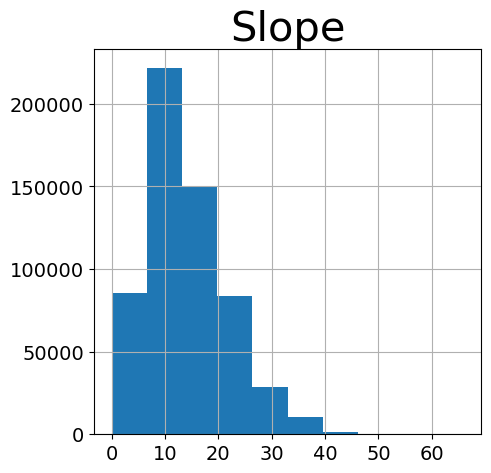

In [48]:
data["Slope"].hist(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Slope",fontsize=30)

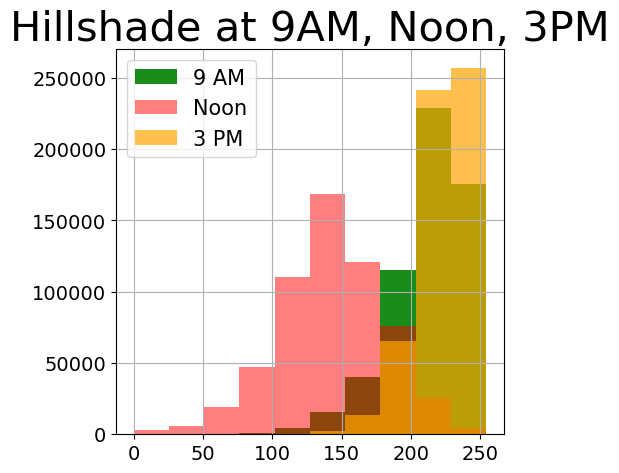

In [49]:
data["Hillshade_9am"].hist(figsize=(5,5),alpha=0.9,color='green')
data["Hillshade_3pm"].hist(figsize=(5,5),alpha=0.5,color='red')
data["Hillshade_Noon"].hist(figsize=(5,5),alpha=0.7,color='orange')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Hillshade at 9AM, Noon, 3PM",fontsize=30)
plt.legend(['9 AM','Noon','3 PM'],fontsize=15)

Text(0.5, 1.0, 'Horizontal Distance To Fire Points')

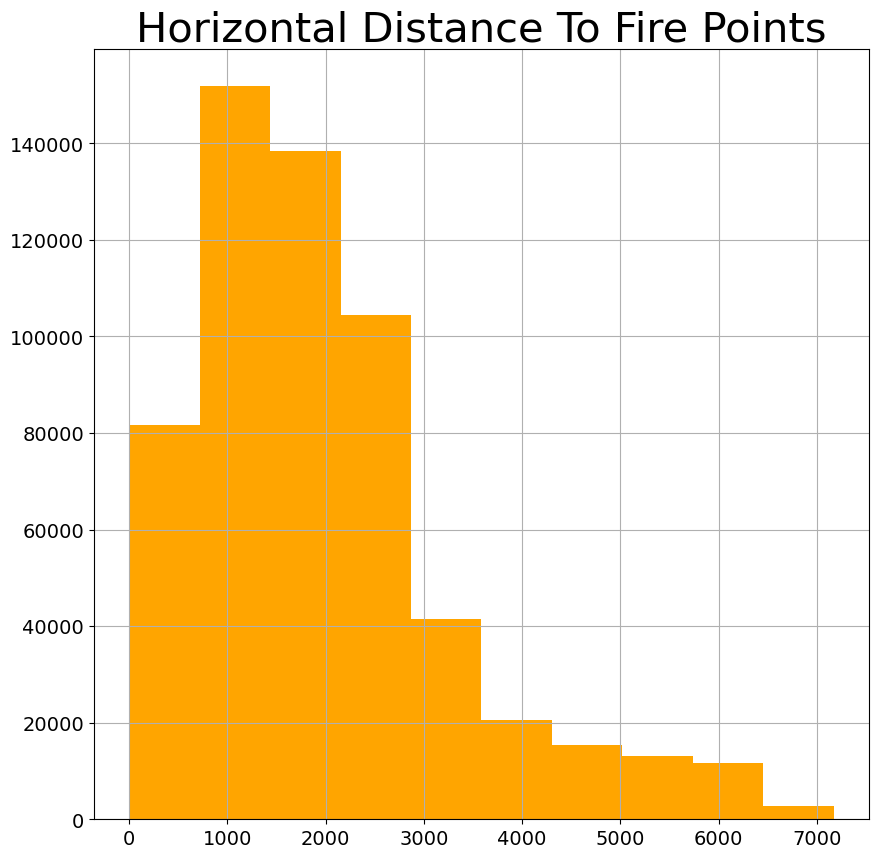

In [50]:
data["Horizontal_Distance_To_Fire_Points"].hist(figsize=(10,10),color='orange')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Horizontal Distance To Fire Points",fontsize=30)

In [51]:
# Spliting dataset into X and y and then to Testing and Training set
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [52]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
# Creating Random Forest Classifier Model and predicting values
rfc = RandomForestClassifier(n_estimators=6)
rfc.fit (X_train,y_train)
y_pred1 = rfc.predict(X_test)

In [55]:
# Creating Decision Tree Classifier Model and predicting values
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred2 = dtc.predict(X_test)

In [56]:
# Calculating and Displaying Accuracy of the models created
print("Accuracy score of Random Forest Classifier is:",accuracy_score(y_test,y_pred1)*100,"%")
print("Accuracy score of Decision Tree Classifier is: ",accuracy_score(y_test, y_pred2)*100,"%")

Accuracy score of Random Forest Classifier is: 93.36247773293287 %
Accuracy score of Decision Tree Classifier is:  93.98036195278951 %


Text(0.5, 1.0, 'Random Forest Classifier')

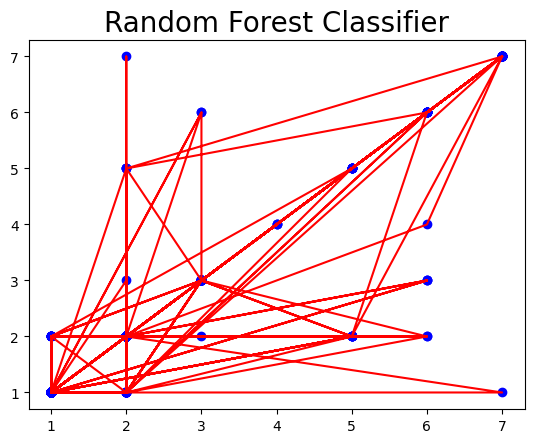

In [57]:
# Showing a graph for Accuracy for Random Forest Classifier
plt.plot(y_test[:1000],y_pred1[:1000],color='red')
plt.scatter(y_test[:1000],y_pred1[:1000],color='blue')
plt.title("Random Forest Classifier",fontsize=20)

Text(0.5, 1.0, 'Decision Tree Classifier')

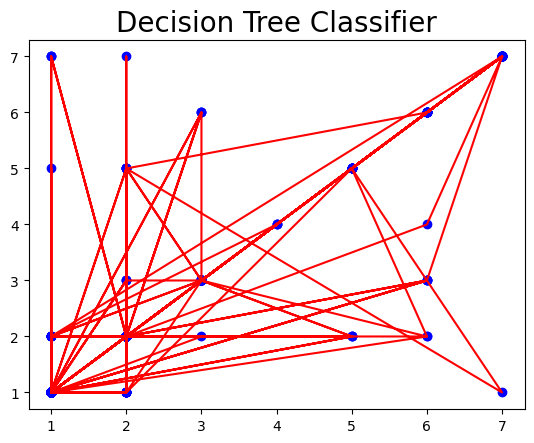

In [58]:
# Showing a graph for Accuracy for Decision Tree Classifier
plt.plot(y_test[:1000],y_pred2[:1000],color='red')
plt.scatter(y_test[:1000],y_pred2[:1000],color='blue')
plt.title("Decision Tree Classifier",fontsize=20)

In [59]:
#  Confusion Matrix for Random Forest Classifier
print("Random Forest Classifier")
print(confusion_matrix(y_true=y_test,y_pred=y_pred1))

Random Forest Classifier
[[40181  1992     0     0    17     2    95]
 [ 3143 53317   109     4    95    81    14]
 [    4   210  6731    36     7   178     0]
 [    0     0    85   445     0    15     0]
 [   60   525    17     0  1302     6     0]
 [   14   187   427    19     3  2796     0]
 [  334    34     0     0     0     0  3718]]


Text(0.5, 1.0, 'Random Forest Classifier')

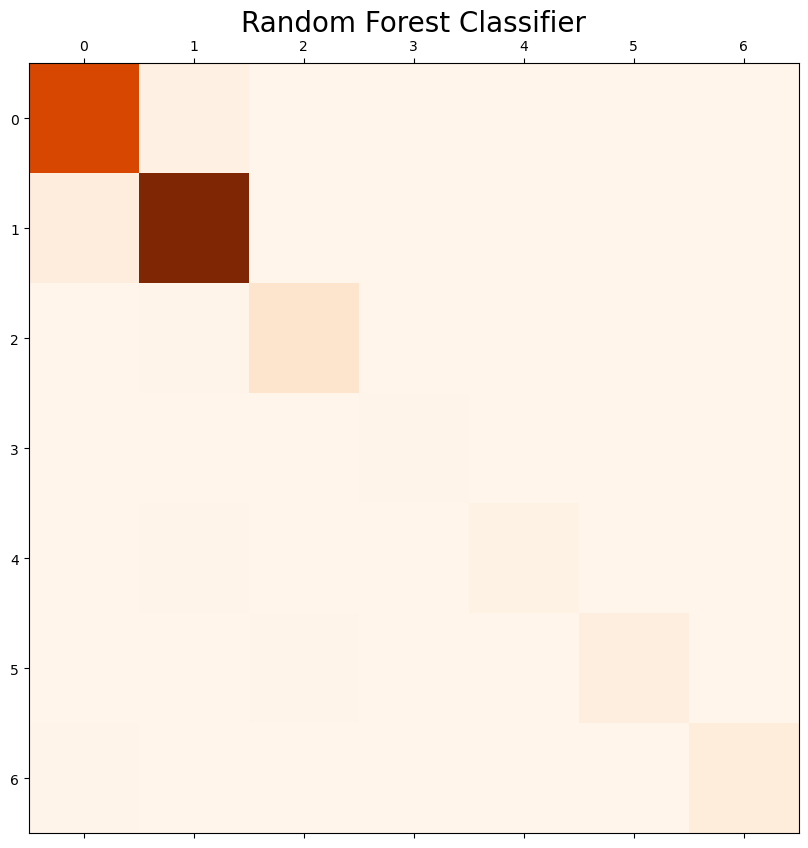

In [60]:
# Confusion Matrix Graph for Random Tree Classifier
fig,ax=plt.subplots(figsize=(10,10))
ax.matshow(confusion_matrix(y_true=y_test,y_pred=y_pred1),cmap=plt.cm.Oranges,alpha=1.0)
plt.title("Random Forest Classifier",fontsize=20)

In [61]:
# Confusion Matrix for Decision Tree Classifier
print("Decision Tree Classifier")
print(confusion_matrix(y_true=y_test,y_pred=y_pred2))

Decision Tree Classifier
[[39761  2286     3     0    48     5   184]
 [ 2348 53852   148     2   290   103    20]
 [    4   152  6672    66    23   249     0]
 [    0     1    51   478     0    15     0]
 [   37   266    29     0  1570     6     2]
 [    7   121   253    22     9  3034     0]
 [  215    30     0     0     0     0  3841]]


Text(0.5, 1.0, 'Decision Tree Classifier')

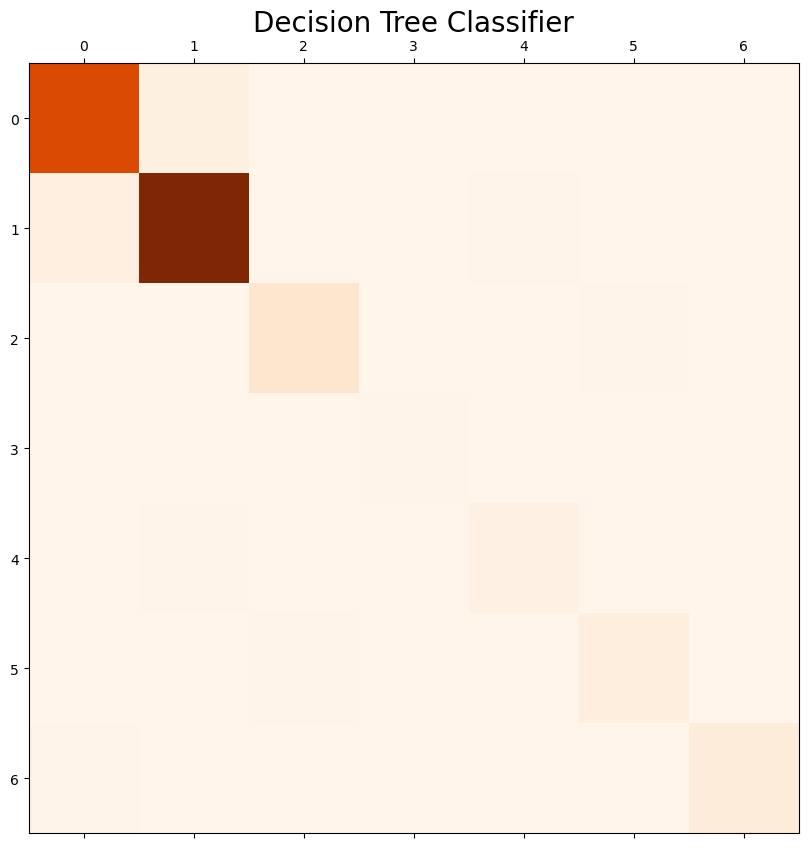

In [62]:
# Confusion Matrix Graph for Decision Tree Classifier
fig,ax=plt.subplots(figsize=(10,10))
ax.matshow(confusion_matrix(y_true=y_test,y_pred=y_pred2),cmap=plt.cm.Oranges,alpha=1.0)
plt.title("Decision Tree Classifier",fontsize=20)